In [12]:
df0=pd.read_csv("data_a.csv",index_col="Id")

In [19]:
bins=df_sale['Cleaned Price'].quantile([0,0.25,0.5,0.75,1]).tolist()
bins


[1750.0, 222125.0, 315000.0, 459000.0, 11000000.0]

In [20]:
df_sale[df_sale['province']==provinces[1]]['Cleaned Price'].value_counts(bins=bins, sort=False).tolist()

[159, 288, 405, 535]

In [21]:
data_dict=dict()
labels_dict=dict()
for province in ['Brussels','Walloon Brabant','FLemish Brabant',
    'Antwerp','FLemish Brabant','Limburg','Liege','Namur',
    'Hainaut','Luxemburg','Hainaut','West Flanders','East Flanders']:
    data_dict[province]=df_sale[df_sale['province']==province]['Cleaned Price'].value_counts(bins=bins, sort=False).tolist()
    labels_dict[province]=['q1','q2','q3','q4']


In [22]:
data_dict['dataset']=[1,1,1,1]
labels_dict['dataset']=['< 222k','222k-315k','315k-459k','> 459k']

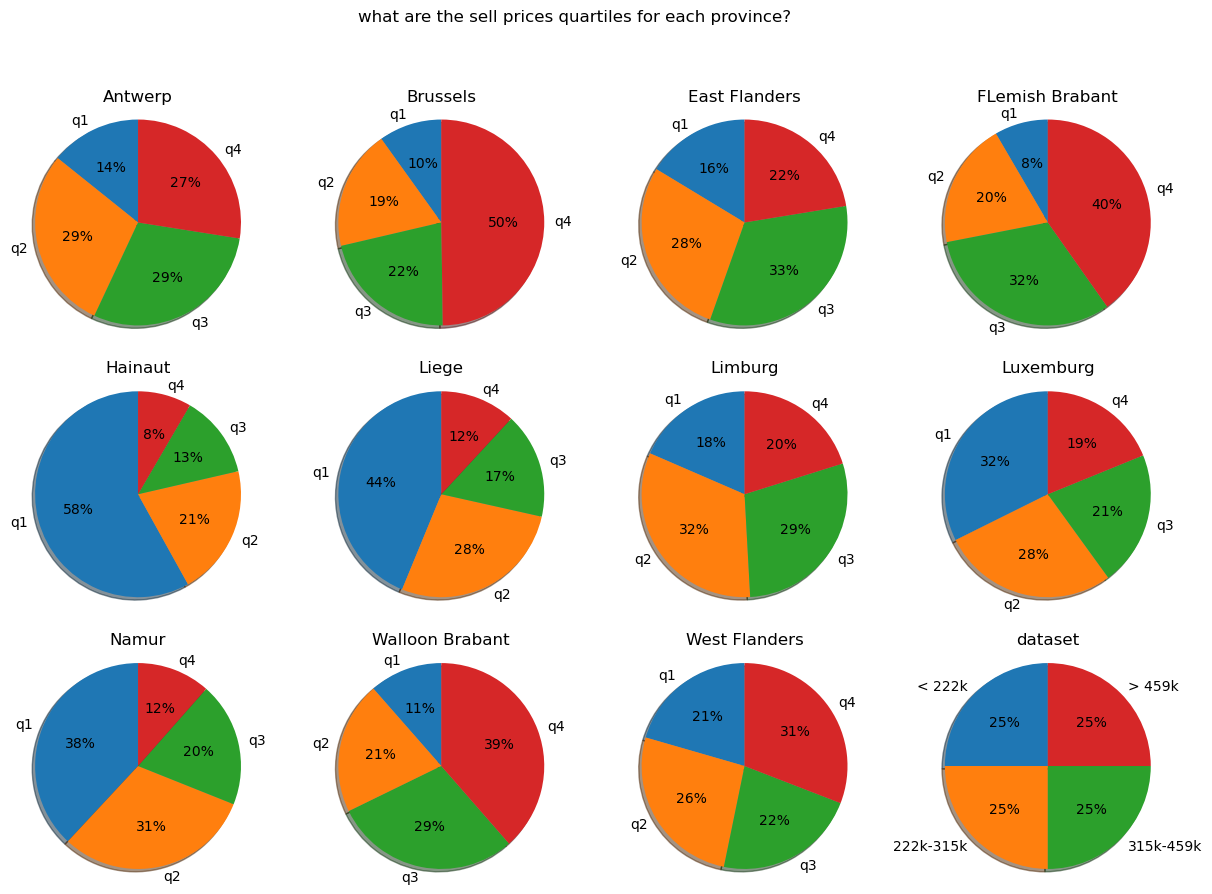

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = [mcolors.to_rgba('red'), mcolors.to_rgba('mistyrose'), mcolors.to_rgba('lightblue'), mcolors.to_rgba('blue')]

fig, ax = plt.subplots(3,4, figsize=(15,10))

row = 0
col = 0
for region in sorted(data_dict):
    ax[row,col].pie(data_dict[region], colors,labels=labels_dict[region], autopct="%.0f%%", shadow=True, startangle=90)
    ax[row,col].set_title(region)
    ax[row,col].axis('equal')
    col+=1
    if col == 4:
        col=0
        row+=1
fig.suptitle("what are the sell prices quartiles for each province?")
plt.show()

In [ ]:
df_rent['province']= df_rent['zipcode'].map(postcode2province)


In [ ]:
df_rent[df_rent['Living Area']<40].describe()

,Living Area,Number of facades,Number of rooms,Price,zipcode
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,28.596154,2.355769,1.019231,635.721154,3854.471154
std,8.449185,0.787256,0.138000,280.099894,2306.348427
min,10.000000,1.000000,1.000000,250.000000,1000.000000
25%,20.000000,2.000000,1.000000,465.250000,2000.000000
50%,30.500000,2.000000,1.000000,580.000000,3650.000000
75%,35.000000,2.000000,1.000000,750.000000,5527.500000
max,39.000000,4.000000,2.000000,2100.000000,9820.000000


In [ ]:
dic_rent=dict()
for key in ['Liege', 'FLemish Brabant', 'Hainaut', 'Luxemburg',
       'Walloon Brabant', 'Brussels', 'Namur', 'Antwerp', 'West Flanders',
       'Limburg', 'East Flanders']:
    dic_rent[key]=df_rent[(df_rent['province']==key)&(df_rent['Price']<580)]['Price'].count()


In [ ]:
dic_rent

{'Liege': 94,
 'FLemish Brabant': 3,
 'Hainaut': 73,
 'Luxemburg': 15,
 'Walloon Brabant': 14,
 'Brussels': 3,
 'Namur': 36,
 'Antwerp': 14,
 'West Flanders': 50,
 'Limburg': 2,
 'East Flanders': 13}

In [ ]:
df_rent[df_rent['province']=='Liege']['Price'].count()

677